## Champions League Final: Man City vs. Inter Milan

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("football.csv", encoding = ('ISO-8859-1'))

In [3]:
df.head()
# 0 = Goal Keeper
# 1 = Forwards
# 2 = Defenders
# 3 = Mid Fieldiers

,Position,MAN City (Team 1),Inter Milan (Team 2),Team 1 (matches_played),Team 2 (matches_played),Team 1 (Mins Played),Team 2 (Mins Played,Team 1 (Goals),Team 2 (Goals),Team 1 (Assists),...,Team 2 (Balls Recovered),Team 1 (Number_of_saves),Team 2 (Number_of_saves),Team 1 (clean_sheets),Team 2 (clean_sheets),Team 1 (Top_speed (km/hr)),Team 2 (Top_speed (km/hr),Team 1 (passing accuracy),Team 2 (passing accuracy),Result
0,0,Ederson,André Onana,10,12,900,1080,0,0,0,...,0,21,45,6,8,28.2,28.7,87.1,80.34,0
1,0,Stefan Ortega,André Onana,2,12,180,1080,0,0,0,...,0,5,45,1,8,23.6,28.7,96.0,80.34,0
2,1,Erling Haaland,Edin Dzeko,10,12,755,775,12,4,1,...,11,0,0,0,0,35.8,31.8,80.5,65.50,1
3,1,Erling Haaland,Lautaro Martínez,10,12,755,912,12,3,1,...,20,0,0,0,0,35.8,32.6,80.5,74.84,1
4,1,Erling Haaland,Joaquín Correa,10,9,755,301,12,1,1,...,7,0,0,0,0,35.8,32.5,80.5,83.00,1


In [4]:
df.shape

(154, 30)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Position                    154 non-null    int64  
 1   MAN City (Team 1)           154 non-null    object 
 2   Inter Milan (Team 2)        154 non-null    object 
 3   Team 1 (matches_played)     154 non-null    int64  
 4   Team 2 (matches_played)     154 non-null    int64  
 5   Team 1 (Mins Played)        154 non-null    int64  
 6   Team 2 (Mins Played         154 non-null    int64  
 7   Team 1 (Goals)              154 non-null    int64  
 8   Team 2 (Goals)              154 non-null    int64  
 9   Team 1 (Assists)            154 non-null    int64  
 10  Team 2 (Assists)            154 non-null    int64  
 11  Team 1 (No. of attempts)    154 non-null    int64  
 12  Team 2 (No. of attempts)    154 non-null    int64  
 13  Team 1 (Attempts_onTarget)  154 non

In [6]:
df.isnull().sum()

Position                      0
MAN City (Team 1)             0
Inter Milan (Team 2)          0
Team 1 (matches_played)       0
Team 2 (matches_played)       0
Team 1 (Mins Played)          0
Team 2 (Mins Played           0
Team 1 (Goals)                0
Team 2 (Goals)                0
Team 1 (Assists)              0
Team 2 (Assists)              0
Team 1 (No. of attempts)      0
Team 2 (No. of attempts)      0
Team 1 (Attempts_onTarget)    0
Team 2 (Attempts_onTarget)    0
Team 1 (Tackles)              0
Team 2 (Tackles)              0
Team 1 (Tackles_won)          0
Team 2 (Tackles_won)          0
Team 1 (Balls Recovered)      0
Team 2 (Balls Recovered)      0
Team 1 (Number_of_saves)      0
Team 2 (Number_of_saves)      0
Team 1 (clean_sheets)         0
Team 2 (clean_sheets)         0
Team 1 (Top_speed (km/hr))    0
Team 2 (Top_speed (km/hr)     0
Team 1 (passing accuracy)     0
Team 2 (passing accuracy)     0
Result                        0
dtype: int64

In [7]:
df.describe()

,Position,Team 1 (matches_played),Team 2 (matches_played),Team 1 (Mins Played),Team 2 (Mins Played,Team 1 (Goals),Team 2 (Goals),Team 1 (Assists),Team 2 (Assists),Team 1 (No. of attempts),...,Team 2 (Balls Recovered),Team 1 (Number_of_saves),Team 2 (Number_of_saves),Team 1 (clean_sheets),Team 2 (clean_sheets),Team 1 (Top_speed (km/hr)),Team 2 (Top_speed (km/hr),Team 1 (passing accuracy),Team 2 (passing accuracy),Result
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,...,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,2.389610,7.623377,8.311688,536.772727,516.448052,1.194805,0.603896,1.207792,0.623377,8.435065,...,23.551948,0.168831,0.584416,0.045455,0.103896,32.350974,31.854416,86.530260,78.323117,0.525974
std,0.649904,3.319733,3.267026,298.370378,323.199973,2.026226,1.012464,1.557924,1.348337,7.787140,...,16.601064,1.736969,5.111440,0.489643,0.908700,1.731168,2.040104,9.480533,10.234082,0.500954
min,0.000000,2.000000,1.000000,40.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,23.600000,26.600000,64.340000,50.000000,0.000000
25%,2.000000,4.000000,6.000000,292.000000,150.000000,0.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,31.400000,31.000000,83.300000,72.500000,0.000000
50%,2.000000,7.000000,10.000000,518.000000,536.000000,1.000000,0.000000,1.000000,0.000000,7.000000,...,20.000000,0.000000,0.000000,0.000000,0.000000,32.550000,32.000000,91.090000,79.910000,1.000000
75%,3.000000,11.000000,11.000000,846.000000,824.250000,1.000000,1.000000,2.000000,0.000000,14.000000,...,40.000000,0.000000,0.000000,0.000000,0.000000,33.000000,33.400000,93.000000,86.100000,1.000000
max,3.000000,12.000000,12.000000,958.000000,1080.000000,12.000000,4.000000,7.000000,5.000000,40.000000,...,54.000000,21.000000,45.000000,6.000000,8.000000,35.800000,35.500000,96.000000,93.170000,1.000000


In [12]:
#remove the columns that are not required
new_df = df.drop(['MAN City (Team 1)','Inter Milan (Team 2)'],axis=1)
new_df

,Position,Team 1 (matches_played),Team 2 (matches_played),Team 1 (Mins Played),Team 2 (Mins Played,Team 1 (Goals),Team 2 (Goals),Team 1 (Assists),Team 2 (Assists),Team 1 (No. of attempts),...,Team 2 (Balls Recovered),Team 1 (Number_of_saves),Team 2 (Number_of_saves),Team 1 (clean_sheets),Team 2 (clean_sheets),Team 1 (Top_speed (km/hr)),Team 2 (Top_speed (km/hr),Team 1 (passing accuracy),Team 2 (passing accuracy),Result
0,0,10,12,900,1080,0,0,0,0,0,...,0,21,45,6,8,28.2,28.70,87.10,80.34,0
1,0,2,12,180,1080,0,0,0,0,0,...,0,5,45,1,8,23.6,28.70,96.00,80.34,0
2,1,10,12,755,775,12,4,1,1,40,...,11,0,0,0,0,35.8,31.80,80.50,65.50,1
3,1,10,12,755,912,12,3,1,3,40,...,20,0,0,0,0,35.8,32.60,80.50,74.84,1
4,1,10,9,755,301,12,1,1,2,40,...,7,0,0,0,0,35.8,32.50,80.50,83.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,3,12,11,907,723,1,1,2,2,19,...,40,0,0,0,0,30.6,32.00,88.84,90.19,0
150,3,12,12,907,903,1,2,2,0,19,...,48,0,0,0,0,30.6,32.50,88.84,84.17,0
151,3,12,11,907,907,1,3,2,0,19,...,32,0,0,0,0,30.6,33.71,88.84,79.91,1
152,3,12,8,907,456,1,0,2,0,19,...,37,0,0,0,0,30.6,31.00,88.84,90.38,0


In [13]:
dataset = pd.get_dummies(new_df, columns=['Position'])

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team 1 (matches_played)     154 non-null    int64  
 1   Team 2 (matches_played)     154 non-null    int64  
 2   Team 1 (Mins Played)        154 non-null    int64  
 3   Team 2 (Mins Played         154 non-null    int64  
 4   Team 1 (Goals)              154 non-null    int64  
 5   Team 2 (Goals)              154 non-null    int64  
 6   Team 1 (Assists)            154 non-null    int64  
 7   Team 2 (Assists)            154 non-null    int64  
 8   Team 1 (No. of attempts)    154 non-null    int64  
 9   Team 2 (No. of attempts)    154 non-null    int64  
 10  Team 1 (Attempts_onTarget)  154 non-null    int64  
 11  Team 2 (Attempts_onTarget)  154 non-null    int64  
 12  Team 1 (Tackles)            154 non-null    int64  
 13  Team 2 (Tackles)            154 non

In [15]:
y= dataset['Result']
x= dataset.drop(['Result'],axis=1)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(random_state=1) 
logistic_reg.fit(x_train, y_train) 
y_pred_logistic_reg = logistic_reg.predict(x_test)
accuracy_score(y_test,y_pred_logistic_reg)

0.6774193548387096

In [20]:
score=cross_val_score(logistic_reg,x_train,y_train,cv=10)
score.mean()

0.7564102564102564

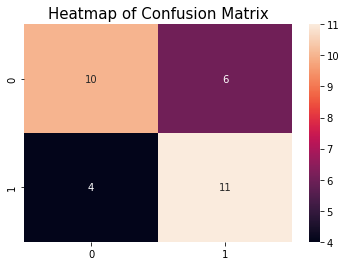

In [21]:
cm=confusion_matrix(y_test,y_pred_logistic_reg)
plt.title('Heatmap of Confusion Matrix',fontsize=15)
sns.heatmap(cm,annot=True)
plt.show()

### Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=1)
rf_classifier.fit(x_train,y_train)
y_pred_rf = rf_classifier.predict(x_test)
accuracy_score(y_test,y_pred_rf)

0.7419354838709677

In [23]:
score=cross_val_score(rf_classifier,x_train,y_train,cv=10)
score.mean()

0.7967948717948719

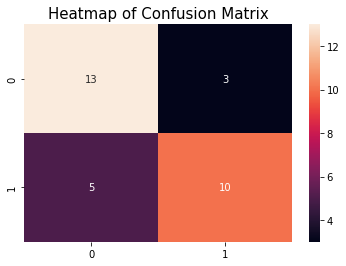

In [25]:
rf=confusion_matrix(y_test,y_pred_rf)
plt.title('Heatmap of Confusion Matrix',fontsize=15)
sns.heatmap(rf,annot=True)
plt.show()